<h1> T01. Introduction to Time Series</h1>

By William Yu, updated 9/29/2023

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

<h3>Introduction to Fred (Federal Reserve Economic Data)</h3>   

https://fred.stlouisfed.org/

Get An API Key in the link:
https://fred.stlouisfed.org/docs/api/api_key.html

In [2]:
# pip install fredapi

In [3]:
from fredapi import Fred
fred = Fred(api_key='8ba88b5e6908c85ddeaff9993a4b4aaa') #!!! This is mine; use yours

In [4]:
data = fred.get_series('SP500')
data.tail()

2024-01-23    4864.60
2024-01-24    4868.55
2024-01-25    4894.16
2024-01-26    4890.97
2024-01-29    4927.93
dtype: float64

In [5]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2608 entries, 2014-01-30 to 2024-01-29
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2516 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


In [6]:
fred.search('bitcoin').T

series id,CBBTCUSD,CBETHUSD,CBBCHUSD,CBLTCUSD,CBCCIND
id,CBBTCUSD,CBETHUSD,CBBCHUSD,CBLTCUSD,CBCCIND
realtime_start,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00
realtime_end,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00
title,Coinbase Bitcoin,Coinbase Ethereum,Coinbase Bitcoin Cash,Coinbase Litecoin,Coinbase Index (DISCONTINUED)
observation_start,2014-12-01 00:00:00,2016-05-18 00:00:00,2017-12-20 00:00:00,2016-08-17 00:00:00,2015-01-01 00:00:00
observation_end,2024-01-29 00:00:00,2024-01-29 00:00:00,2024-01-29 00:00:00,2024-01-29 00:00:00,2020-05-26 00:00:00
frequency,"Daily, 7-Day","Daily, 7-Day","Daily, 7-Day","Daily, 7-Day","Daily, 7-Day"
frequency_short,D,D,D,D,D
units,U.S. Dollars,U.S. Dollars,U.S. Dollars,U.S. Dollars,"Index Jan 1, 2015=100"
units_short,U.S. $,U.S. $,U.S. $,U.S. $,"Index Jan 1, 2015=100"


In [7]:
df1 = fred.get_series('CBBTCUSD')
print(df1.head())
print(df1.tail())

2014-12-01    370.0
2014-12-02    378.0
2014-12-03    378.0
2014-12-04    377.1
2014-12-05      NaN
dtype: float64
2024-01-25    39944.50
2024-01-26    41792.29
2024-01-27    42144.13
2024-01-28    41991.74
2024-01-29    43272.35
dtype: float64


In [8]:
fred.search('retail sales').T

series id,TOTALSA,TOTALNSA,RSXFS,RSXFSN,MARTSMPCSM44000USS,MARTSMPCSM44000USN,HTRUCKSSAAR,HTRUCKSSA,HTRUCKSNSA,RETAILIRSA,...,SMU34207644244800001A,IPUHN45321T300000000,SMU48309804200000001A,SMU48309804200000001SA,CANSACRAISMEI,CANSACRQISMEI,COLSLRTTO01IXOBQ,COLSLRTTO01GPSAM,COLSLRTTO01GYSAQ,COLSLRTTO01IXOBM
id,TOTALSA,TOTALNSA,RSXFS,RSXFSN,MARTSMPCSM44000USS,MARTSMPCSM44000USN,HTRUCKSSAAR,HTRUCKSSA,HTRUCKSNSA,RETAILIRSA,...,SMU34207644244800001A,IPUHN45321T300000000,SMU48309804200000001A,SMU48309804200000001SA,CANSACRAISMEI,CANSACRQISMEI,COLSLRTTO01IXOBQ,COLSLRTTO01GPSAM,COLSLRTTO01GYSAQ,COLSLRTTO01IXOBM
realtime_start,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,...,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00
realtime_end,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,...,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00,2024-01-30 00:00:00
title,Total Vehicle Sales,Total Vehicle Sales,Advance Retail Sales: Retail Trade,Advance Retail Sales: Retail Trade,Advance Retail Sales: Retail Trade,Advance Retail Sales: Retail Trade,Motor Vehicle Retail Sales: Heavy Weight Trucks,Motor Vehicle Retail Sales: Heavy Weight Trucks,Motor Vehicle Retail Sales: Heavy Weight Trucks,Retailers: Inventories to Sales Ratio,...,All Employees: Retail Trade: Clothing and Clot...,Sectoral Output for Retail Trade: Office Suppl...,"All Employees: Retail Trade in Longview, TX (MSA)","All Employees: Retail Trade in Longview, TX (MSA)",Sales: Retail Trade: Car Registration: Passeng...,Sales: Retail Trade: Car Registration: Passeng...,Sales: Retail Trade: Total Retail Trade: Volum...,Sales: Retail Trade: Total Retail Trade: Volum...,Sales: Retail Trade: Total Retail Trade: Volum...,Sales: Retail Trade: Total Retail Trade: Volum...
observation_start,1976-01-01 00:00:00,1976-01-01 00:00:00,1992-01-01 00:00:00,1992-01-01 00:00:00,1992-02-01 00:00:00,1992-02-01 00:00:00,1967-01-01 00:00:00,1967-01-01 00:00:00,1967-01-01 00:00:00,1992-01-01 00:00:00,...,1990-01-01 00:00:00,1987-01-01 00:00:00,1990-01-01 00:00:00,1990-01-01 00:00:00,1960-01-01 00:00:00,1960-01-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2014-01-01 00:00:00,2013-01-01 00:00:00
observation_end,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:00:00,2023-11-01 00:00:00,...,2013-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2023-12-01 00:00:00,2018-01-01 00:00:00,2018-10-01 00:00:00,2023-07-01 00:00:00,2023-10-01 00:00:00,2023-07-01 00:00:00,2023-10-01 00:00:00
frequency,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,"Monthly, End of Period",...,Annual,Annual,Annual,Monthly,Annual,Quarterly,Quarterly,Monthly,Quarterly,Monthly
frequency_short,M,M,M,M,M,M,M,M,M,M,...,A,A,A,M,A,Q,Q,M,Q,M
units,Millions of Units,Thousands of Units,Millions of Dollars,Millions of Dollars,Percent Change from Preceding Period,Percent Change from Preceding Period,Millions of Units,Thousands of Units,Thousands of Units,Ratio,...,Thousands of Persons,Millions of Dollars,Thousands of Persons,Thousands of Persons,Index 2015=100,Index 2015=100,Index 2015=100,Growth rate previous period,Growth rate same period previous year,Index 2015=100
units_short,Mil. of Units,Thous. of Units,Mil. of $,Mil. of $,% Chg. from Preceding Period,% Chg. from Preceding Period,Mil. of Units,Thous. of Unit

In [9]:
# https://fred.stlouisfed.org/series/RSAFSNA
df2 = fred.get_series('RSAFSNA')    
df2.tail()

2023-08-01    721625.0
2023-09-01    685347.0
2023-10-01    699313.0
2023-11-01    712614.0
2023-12-01    771433.0
dtype: float64

<h3>Trend and Seasonality Decomposition</h3>   

<AxesSubplot:>

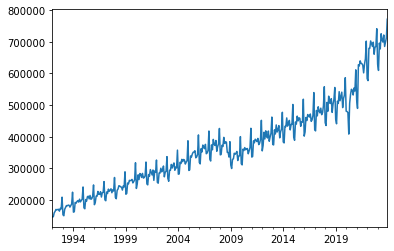

In [10]:
df2.plot()

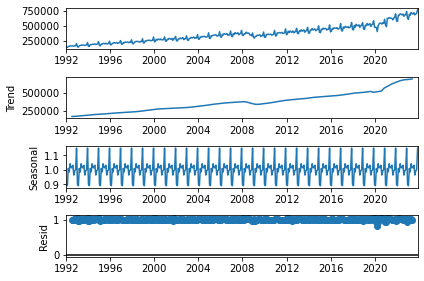

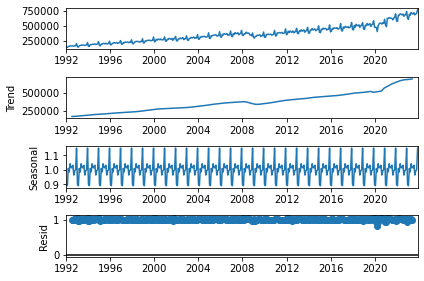

In [11]:
dc2 = seasonal_decompose(df2, model='multiplicable', period=12)
dc2.plot()

<AxesSubplot:>

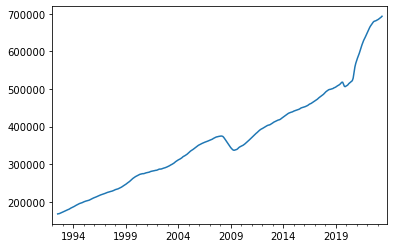

In [12]:
dc2.trend.plot()

<AxesSubplot:>

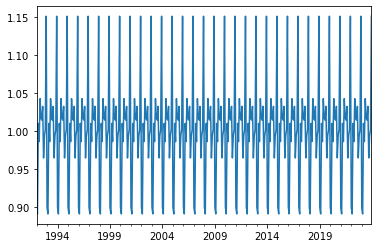

In [13]:
dc2.seasonal.plot()

<AxesSubplot:>

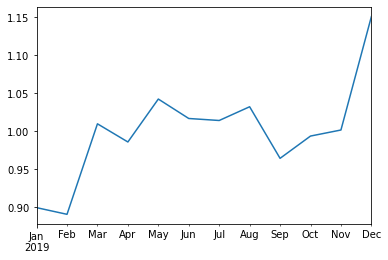

In [14]:
dc2.seasonal['2019-01-01':'2019-12-01'].plot()